<a href="https://colab.research.google.com/github/Audorion/Least-Square-Algorithm-NumPy-without-SciPy/blob/main/LeastSquareNumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
from scipy import stats

from google.colab import files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Загрузка файла
uploaded = files.upload()
import io

Saving Data.csv to Data.csv


In [ ]:
#Считывания данных
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']), sep=";", dtype={'x1': np.float64, 'x2': np.float64})
print(data)

      x1   x2      y
0   36.0  2.0  45.90
1   34.0  1.6  23.40
2   27.0  2.3  46.80
3   25.0  2.5  50.40
4   22.0  1.3  23.40
5   21.0  0.6  10.35
6   19.0  2.6  66.60
7   18.0  0.6   7.11
8   17.0  1.1  14.40
9   15.0  2.4  29.70
10  14.0  1.4  17.38
11   9.0  0.4   6.60
12   8.0  2.2  28.05
13   4.5  1.0   7.81
14   3.7  2.9  15.18
15   3.4  0.9   5.94
16   3.0  1.7   6.38
17   2.6  0.8   6.82
18   2.0  2.1   8.80
19   1.9  1.7   8.25


In [ ]:
#Инициализация данных
X = data.iloc[:, 0:2]
w = np.ones(20)
X = pd.DataFrame(X)
W = pd.DataFrame(w)
X['Ones'] = W
 
print(X)
print('   ')
Y = data.iloc[:, 2]
print(Y[:5])

      x1   x2  Ones
0   36.0  2.0   1.0
1   34.0  1.6   1.0
2   27.0  2.3   1.0
3   25.0  2.5   1.0
4   22.0  1.3   1.0
5   21.0  0.6   1.0
6   19.0  2.6   1.0
7   18.0  0.6   1.0
8   17.0  1.1   1.0
9   15.0  2.4   1.0
10  14.0  1.4   1.0
11   9.0  0.4   1.0
12   8.0  2.2   1.0
13   4.5  1.0   1.0
14   3.7  2.9   1.0
15   3.4  0.9   1.0
16   3.0  1.7   1.0
17   2.6  0.8   1.0
18   2.0  2.1   1.0
19   1.9  1.7   1.0
   
0    45.9
1    23.4
2    46.8
3    50.4
4    23.4
Name: y, dtype: float64


Text(0.5, 0, 'Y')

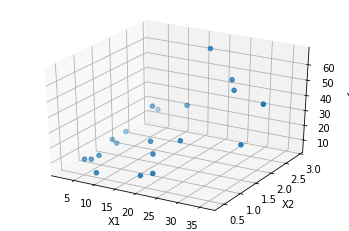

In [ ]:
# Визуализация данных 
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [ ]:
# Нахождение коэфицентов путём метода наименьших квадратов
X = np.array(X)
Y = np.array(Y)
a = np.linalg.solve(np.dot(X.T,X ), np.dot(X.T, Y)) 
print(a)
predictedY = np.dot(X, a)
print(predictedY)

[  0.91375319  13.98004571 -14.04571276]
[46.80949354 39.38996888 42.77972853 43.74823129 24.23091687 13.53113168
 39.66371671 10.78987211 16.86614177 33.2126948  18.31889591 -0.22991576
 24.02041332  4.04622231 29.8773066   1.64308922 12.46162451 -0.4859179
 17.13988961 11.456496  ]


In [ ]:
ErrorSq = Y - predictedY
ErrorSqMean = Y - Y.mean()
RError = 1 - (ErrorSq.dot(ErrorSq) / ErrorSqMean.dot(ErrorSqMean))
print("Ошибка: ", RError*100)
print("Коэфеценты: ", a[0], ',', a[1], ',', a[2])

Невязка:  74.26891650503569
Коэфеценты:  0.9137531913686213 , 13.980045706800809 , -14.045712761943424


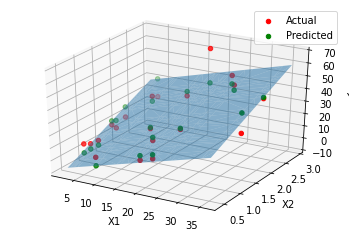

In [ ]:
#  Подготовка данных для визуализации
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# Визуализация предсказанных данных и реальных. 
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()
plt.show()

In [ ]:
d = {'X1': X[:, 0], 'X2': X[:, 1], 'Y': predictedY}
df = pd.DataFrame(data=d)
print(df.describe(include='all'))

              X1         X2          Y
count  20.000000  20.000000  20.000000
mean   14.305000   1.605000  21.463500
std    10.875394   0.751472  17.908005
min     1.900000   0.400000   5.940000
25%     3.625000   0.975000   7.635000
50%    14.500000   1.650000  14.790000
75%    21.250000   2.225000  28.462500
max    36.000000   2.900000  66.600000


In [ ]:
stat, p = scipy.stats.shapiro(df['Y']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p)) #принимаем гипотезу нормальности распределения

Statistics=0.820, p-value=0.002


In [ ]:
scipy.stats.ttest_ind(X, predictedY)

Ttest_indResult(statistic=array([-1.69565086, -5.74773119, -5.92985619]), pvalue=array([9.81318810e-02, 1.26313531e-06, 7.10490245e-07]))

In [ ]:
correlation_matrix = np.corrcoef(df)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.7327721930172779


In [ ]:
F = (r_squared/2)/((1-r_squared)*(19-3-1))
print(F)
fstat = (r_squared/(1-r_squared))*((19-3-1)/3)
print(fstat)

0.09140418447853323
13.710627671779982


In [ ]:
!pip install symbulate
import symbulate as sm

dfN = 15 #degrees of freedom in the numerator of F-statistic
dfD = 3 #degrees of freedom in the denominator of F-statistic

pVal = 1-sm.F(dfN,dfD).cdf(fstat)
print(pVal)

0.026419894272684097
